In [6]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

Hatayi ozellikle arttiriyoruz ki normal bir data gibi olsun, bias ve noise ile oynabiliriz.

In [7]:
x, y = make_regression(n_samples=678,
                       n_features=1,
                       n_targets=1,
                       bias=0.7,
                       noise=11,
                       shuffle=False)

df = pd.DataFrame({"x":x[:,0], "y":y},index=None)
df.head()

,x,y
0,1.357210,92.896928
1,-0.762352,-56.819026
2,0.626691,36.892966
3,-0.638894,-50.398049
4,0.135150,33.917583


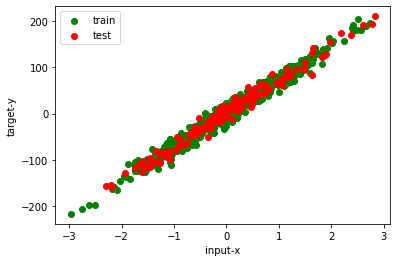

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y
                                          ,test_size=0.2
                                          ,shuffle = False
                                          ,random_state = 0)

plt.scatter(x_train, y_train, color='green', label='train')
plt.scatter(x_test, y_test, color='red', label='test')
plt.xlabel('input-x')
plt.ylabel('target-y')
plt.legend()
plt.show()

In [9]:
def ScoreResults(model, x_train, x_test, y_train, y_test):

    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    mse_train = metrics.mean_squared_error(y_train, y_train_predict)
    mse_test = metrics.mean_squared_error(y_test, y_test_predict)

    return [r2_train, r2_test, mse_train, mse_test]

lineer_regression = LinearRegression()
lineer_regression.fit(x_train, y_train)

result_lineer_regression = ScoreResults(model = lineer_regression, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

print(f"Train R2 Score: {result_lineer_regression[0]} MSE: {result_lineer_regression[2]}")
print(f"Test R2 Score: {result_lineer_regression[1]} MSE: {result_lineer_regression[3]}")

Train R2 Score: 0.9737724083266769 MSE: 126.81582340987941
Test R2 Score: 0.9805126944741872 MSE: 116.187728782671


Validation kullanmdan onceki degerler yukaridaki gibidir. Simdi cross validation K-Fold yontemi kullanarak farkli iterasyonlarda calistiralim.

In [14]:
scores=[]
lineer_regression_cv = LinearRegression()
k = 5
iter = 1

cv = KFold(n_splits=k,
           random_state=None,
           shuffle=False)

for train_index, test_index in cv.split(x):
    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    lineer_regression_cv.fit(x_train, y_train)
    result = ScoreResults(model = lineer_regression_cv
                          ,x_train = x_train
                          ,x_test = x_test
                          ,y_train = y_train
                          ,y_test = y_test)
    print(iter)
    print(f"Train R2 Score: {result[0]} MSE: {result[2]}")
    print(f"Test R2 Score: {result[1]} MSE: {result[3]}")
    scores.append(lineer_regression_cv.score(x_test, y_test))
    iter += 1


1
Train R2 Score: 0.9771387479167513 MSE: 122.67355612803733
Test R2 Score: 0.9654015405934767 MSE: 132.6281125993875
2
Train R2 Score: 0.97604579868588 MSE: 120.63238067004119
Test R2 Score: 0.9723395606590448 MSE: 143.02221040930786
3
Train R2 Score: 0.9755330142930198 MSE: 124.99736794786159
Test R2 Score: 0.9745538500530821 MSE: 124.36411329792297
4
Train R2 Score: 0.9742981454211391 MSE: 127.23218621341893
Test R2 Score: 0.9791485895639694 MSE: 114.29241509852027
5
Train R2 Score: 0.9738908244916231 MSE: 126.84316869143672
Test R2 Score: 0.9802881056911199 MSE: 116.02113666108357
